## Práctica Clustering Particional


En esta práctica vamos a testear técnicas de clustering particional. Para ello vamos a trabajar con una muestra del dataset de los dígitos que cargaremos desde sklearn.datasets.

In [14]:
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [15]:
digits = load_digits()
datos = digits.data
categorias_reales = digits.target

Una vez cargados, end digits.data tendremos el valor de los pixeles de las imágenes y en digits.target la categoría  a la que pertenecen.

<Figure size 640x480 with 0 Axes>

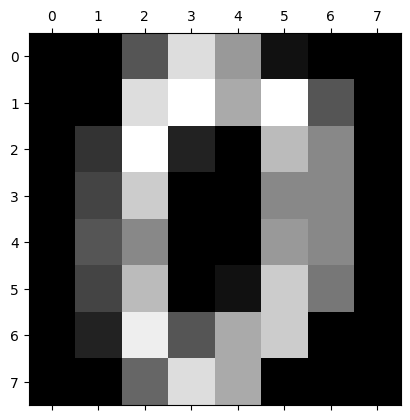

In [16]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

A pesar de tener los valores de las distintas categorías, no vamos a usar esta información a la hora de clusterizar dicha información, simplemente la usaremos para comprobar a posteriori la calidad de la clusterización.

Para ello deberéis desarrollar una función que tenga como entrada el clúster al que asocia a cada muestra y las categorías que tienen en realidad las muestras e imprima por pantalla el número del cluster, el número de categorías que aparecen en el clúster, el procentaje de instancias de la categoría mayoritaria y la entropía de la misma (-sumatorio del porcentaje de las instancias de cada categoría que aparece en el cluster multiplicado por el logaritmo de dicho porcentaje).

$Entropy=-\sum_{i=1}^{N}p_{i}\cdot log(p_{i})$

Por ejemplo, si para el clúster 1 aparecen 5 elementos del dígito 2, 7 del 3 y 2 del 4, debería imprimirse por pantalla

Clúster 1

% clase mayoritaria- el valor de 7/(7+5+2)

Entropía el valor de -(2/14·log(2/14)+7/14·log(7/14)+5/14·log(5/14))


Y así con todos los clústers

In [17]:
def calcular_metricas( cluster_asociado, categorias_reales):
    num_clusters = len(np.unique(cluster_asociado))
    for cluster in range(num_clusters) :
        indices_cluster = np.where(cluster_asociado == cluster)[0]
        categorias_cluster = categorias_reales[indices_cluster]
        num_categorias = len(np.unique(categorias_cluster))
        contador_categorias = Counter(categorias_cluster)
        mayoritaria = max(contador_categorias, key=contador_categorias.get)
        porcentaje_mayoritaria = contador_categorias[mayoritaria] / len(categorias_cluster) * 100
        entropia = 0
        total_instancias = len(categorias_cluster)
        for categoria, count in contador_categorias.items():
            probabilidad = count / total_instancias
            entropia -= probabilidad * np.log(probabilidad)
        
        # Imprimir los resultados
        print(f"Cluster {cluster}:")
        print(f"Número de categorías: {num_categorias}")
        print(f"Porcentaje de la categoría mayoritaria: {porcentaje_mayoritaria:.2f}%")
        print(f"Entropía: {entropia:.4f}")
        print()

Lo primero que deberás hacer es definir el gráfico del método del codo. A partir del mismo deberás analizar cuántos clústers parecen un número prometedor de los mismos.

Realice el cálculo con 10 pasadas para cada iteración, un número máximo de 50 iteraciones y una tolerancia de 0.001. Para tener repetitibilidad, fije la semilla inicial a un valor de su elección y grafique el resultado obtenido.



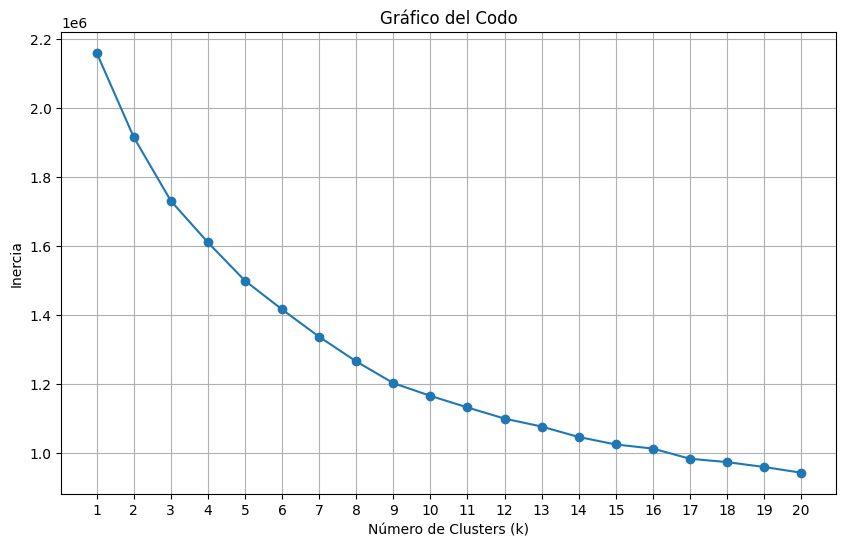

In [18]:
np.random.seed(42)

# Definir los parámetros del KMeans
num_pasadas = 10
max_iteraciones = 50
tolerancia = 0.001

# Calcular la inercia para diferentes valores de k
inercias = []
valores_k = range(1, 21)  
for k in valores_k:
    kmeans = KMeans(n_clusters=k, 
                    n_init=num_pasadas, 
                    max_iter=max_iteraciones, 
                    tol=tolerancia,
                    random_state=42)
    kmeans.fit(datos)
    inercias.append(kmeans.inertia_)

# Graficar el gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(valores_k, inercias, marker='o', linestyle='-')
plt.title('Gráfico del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(valores_k)
plt.grid(True)
plt.show()


Indique el número de clusters que ha seleccionado y realice el proceso de clustering con dicho número de clusters.

In [19]:
# Número óptimo de clusters
k_optimo = 9

# Realizar clustering con el número óptimo de clusters
kmeans_optimo = KMeans(n_clusters=k_optimo, 
                       n_init=num_pasadas, 
                       max_iter=max_iteraciones, 
                       tol=tolerancia,
                       random_state=42)
clusters_optimos = kmeans_optimo.fit_predict(datos)

# Mostrar los resultados del clustering
calcular_metricas(clusters_optimos, categorias_reales)


Cluster 0:
Número de categorías: 7
Porcentaje de la categoría mayoritaria: 58.51%
Entropía: 1.2419

Cluster 1:
Número de categorías: 3
Porcentaje de la categoría mayoritaria: 98.79%
Entropía: 0.0739

Cluster 2:
Número de categorías: 4
Porcentaje de la categoría mayoritaria: 98.33%
Entropía: 0.1031

Cluster 3:
Número de categorías: 6
Porcentaje de la categoría mayoritaria: 86.96%
Entropía: 0.5744

Cluster 4:
Número de categorías: 6
Porcentaje de la categoría mayoritaria: 85.43%
Entropía: 0.6372

Cluster 5:
Número de categorías: 4
Porcentaje de la categoría mayoritaria: 83.43%
Entropía: 0.5376

Cluster 6:
Número de categorías: 4
Porcentaje de la categoría mayoritaria: 96.72%
Entropía: 0.1803

Cluster 7:
Número de categorías: 8
Porcentaje de la categoría mayoritaria: 45.81%
Entropía: 1.1270

Cluster 8:
Número de categorías: 5
Porcentaje de la categoría mayoritaria: 40.54%
Entropía: 1.3088



Imprime por pantalla la calidad de la separación obtenida usando la función que ha desarrollado con anterioridad.

In [20]:
# Calcular y mostrar las métricas para los clusters óptimos
calcular_metricas(clusters_optimos, categorias_reales)


Cluster 0:
Número de categorías: 7
Porcentaje de la categoría mayoritaria: 58.51%
Entropía: 1.2419

Cluster 1:
Número de categorías: 3
Porcentaje de la categoría mayoritaria: 98.79%
Entropía: 0.0739

Cluster 2:
Número de categorías: 4
Porcentaje de la categoría mayoritaria: 98.33%
Entropía: 0.1031

Cluster 3:
Número de categorías: 6
Porcentaje de la categoría mayoritaria: 86.96%
Entropía: 0.5744

Cluster 4:
Número de categorías: 6
Porcentaje de la categoría mayoritaria: 85.43%
Entropía: 0.6372

Cluster 5:
Número de categorías: 4
Porcentaje de la categoría mayoritaria: 83.43%
Entropía: 0.5376

Cluster 6:
Número de categorías: 4
Porcentaje de la categoría mayoritaria: 96.72%
Entropía: 0.1803

Cluster 7:
Número de categorías: 8
Porcentaje de la categoría mayoritaria: 45.81%
Entropía: 1.1270

Cluster 8:
Número de categorías: 5
Porcentaje de la categoría mayoritaria: 40.54%
Entropía: 1.3088



## Silhoutte 
Imprima por pantalla  el coeficiente de silueta para el número de clústers de ha seleccionado y grafique el mismo para el número de clústers seleccionado

El coeficiente de silueta para 9 clusters es: 0.19


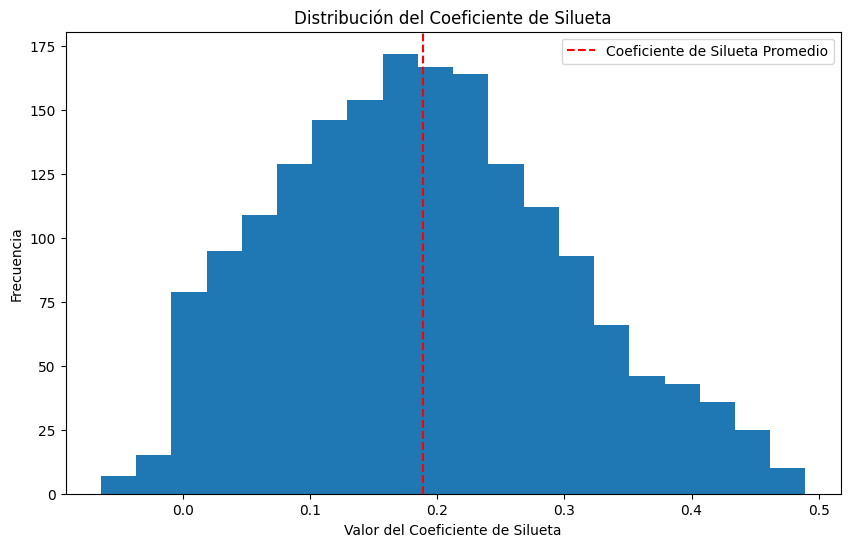

In [21]:


# Calcular el coeficiente de silueta para el número óptimo de clusters
silhouette_avg = silhouette_score(datos, clusters_optimos)
print(f"El coeficiente de silueta para {k_optimo} clusters es: {silhouette_avg:.2f}")

# Calcular los valores de silueta para cada instancia
valores_silueta = silhouette_samples(datos, clusters_optimos)

# Graficar el coeficiente de silueta para cada instancia
plt.figure(figsize=(10, 6))
plt.hist(valores_silueta, bins=20)
plt.title('Distribución del Coeficiente de Silueta')
plt.xlabel('Valor del Coeficiente de Silueta')
plt.ylabel('Frecuencia')
plt.axvline(x=silhouette_avg, color='red', linestyle='--', label='Coeficiente de Silueta Promedio')
plt.legend()
plt.show()


Dibuje, asimismo, el valor de cada silhouette coefficient para cada punto para ver su cercanía con el resto de puntos de su grupo y con los del grupo más cercano

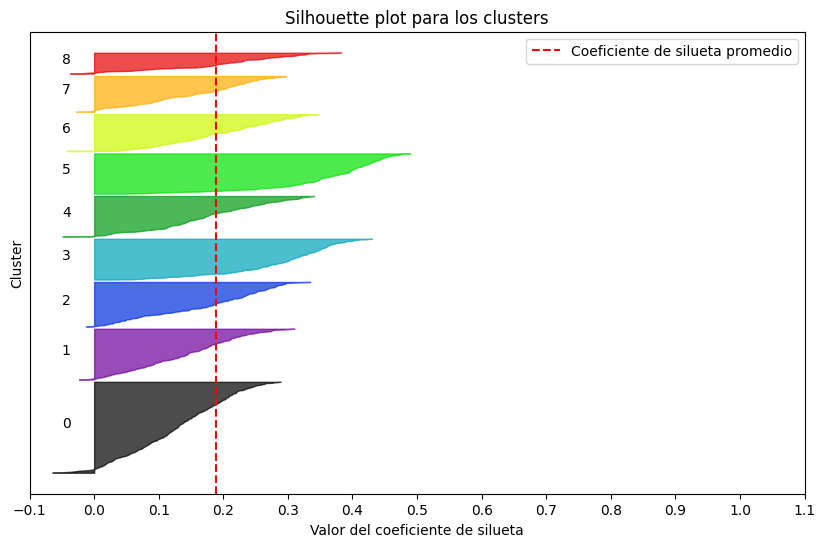

In [22]:
valores_silueta = silhouette_samples(datos, clusters_optimos)

# Calcular el tamaño de cada cluster
tamanos_cluster = np.bincount(clusters_optimos)

# Ordenar los valores de silueta
valores_silueta_ordenados = [valores_silueta[clusters_optimos == i] for i in range(k_optimo)]

# Ordenar los índices de los clusters por tamaño
indices_clusters_ordenados = np.argsort(tamanos_cluster)[::-1]

# Configurar el rango y espaciado para dibujar
y_lower = 10
espaciado = 10


plt.figure(figsize=(10, 6))
for i, cluster in enumerate(indices_clusters_ordenados):
    valores_silueta_cluster = valores_silueta_ordenados[cluster]
    valores_silueta_cluster.sort()
    
    # Calcular los límites para este cluster
    size_cluster = valores_silueta_cluster.shape[0]
    y_upper = y_lower + size_cluster
    
    
    color = plt.cm.nipy_spectral(float(i) / k_optimo)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, valores_silueta_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Etiquetar el cluster con su número y tamaño
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    
    # Actualizar el límite inferior para el siguiente cluster
    y_lower = y_upper + espaciado

# Configurar el gráfico
plt.title("Silhouette plot para los clusters")
plt.xlabel("Valor del coeficiente de silueta")
plt.ylabel("Cluster")
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Coeficiente de silueta promedio")
plt.yticks([])
plt.xticks(np.arange(-0.1, 1.1, 0.1))
plt.legend(loc='upper right')
plt.show()


Plotee el sihoutte score para un número de clusters entre 5 y 15 para evaluar el comportamiento del mismo ante distinto número de clústers

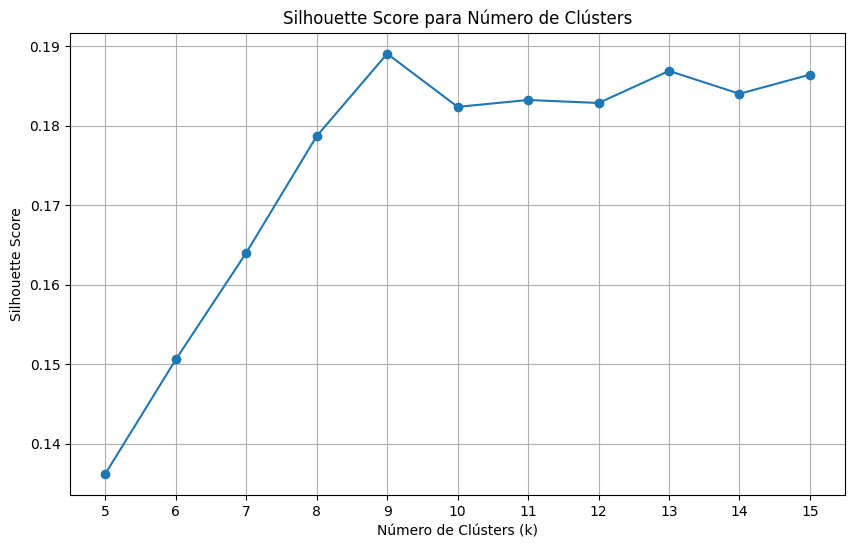

In [23]:
rango_clusters = range(5, 16)
silhouette_scores = []

# Calcular el silhouette score para cada valor de k
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, 
                    n_init=num_pasadas, 
                    max_iter=max_iteraciones, 
                    tol=tolerancia,
                    random_state=42)
    clusters = kmeans.fit_predict(datos)
    silhouette_avg = silhouette_score(datos, clusters)
    silhouette_scores.append(silhouette_avg)

# Graficar el silhouette score para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(rango_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score para Número de Clústers')
plt.xlabel('Número de Clústers (k)')
plt.ylabel('Silhouette Score')
plt.xticks(rango_clusters)
plt.grid(True)
plt.show()



## Nuevo dataset

Ahora vamos a trabajar con un dataset un poco diferente.

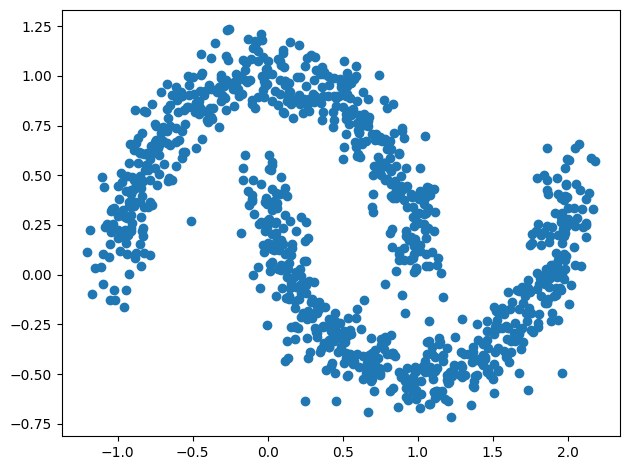

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1234)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

En este caso, podríamos ver cómo un Kmeans clásico quizá no daría un resultado adecuado

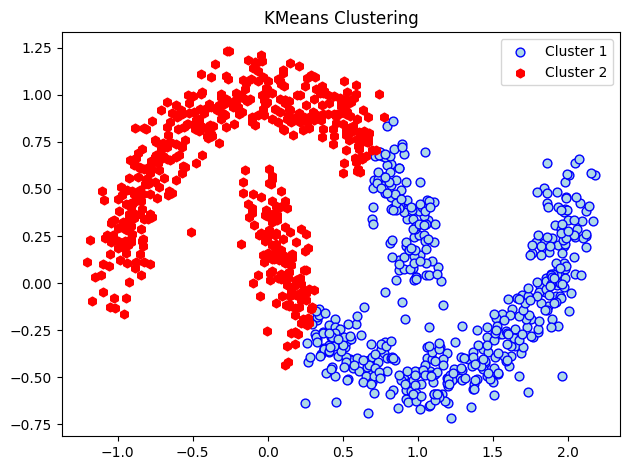

In [25]:
n_init = 10
max_iter=300
random_state=1234
tol=0.01
kmeans = KMeans(n_clusters=2, 
                n_init=n_init, 
                max_iter=max_iter, 
                tol=tol, 
                random_state=random_state)

kmeans.fit(X)
y_km = kmeans.predict(X)
plt.scatter(X[y_km == 0, 0],X[y_km == 0, 1],c='lightblue',edgecolor='blue',marker='o',s=40,label='Cluster 1')
plt.scatter(X[y_km == 1, 0],X[y_km == 1, 1],c='red',edgecolor='red',marker='h',s=40,label='Cluster 2')
plt.legend()
plt.title('KMeans Clustering')
plt.tight_layout()
plt.show()

De las metodologías que hemos visto, propón una metodología que consideras que pudiese adecuarse a este set de datos. Grafique la clusterización obtenida. 

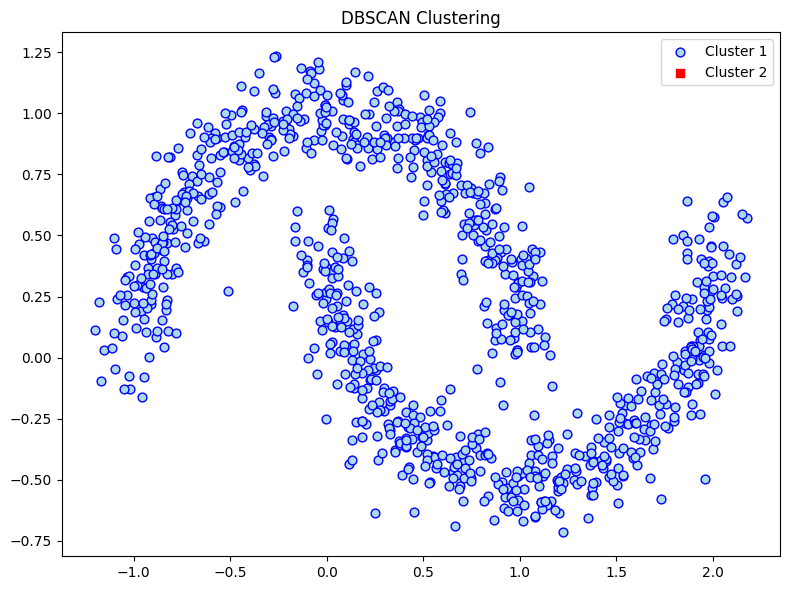

In [59]:
from sklearn.cluster import DBSCAN

colors = ['lightblue', 'red']
vectorized = lambda x: colors[x % len(colors)]

dbscan = DBSCAN(eps=1, min_samples=2)

# Ajustar el modelo a los datos
y_dbscan = dbscan.fit_predict(X)

# Graficar los clusters obtenidos
plt.figure(figsize=(8, 6))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], c='lightblue', edgecolor='blue', marker='o', s=40, label='Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], c='red', edgecolor='red', marker='s', s=40, label='Cluster 2')

plt.legend()
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()
